<a href="https://colab.research.google.com/github/pms11/CSI4142-A1-Dataset/blob/main/CSI4142_A1_%7C_Group_63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  #  **CSI 4142 - ASSIGNMENT 1**

<u>**Group 63 :**</u><br></br>

1) **Mor Fall Sylla** - 300218857

2) **Yacine Ibrahim Djido** - 300263186



# **A/ Dataset I : German Credit Data**
<br><u>**Introduction:**</u></br>

The German Credit Dataset was provided by Prof. Hogmann and is designed to assess the creditworthiness of individuals applying for loans. It contains a variety of financial and demographic features that can be used to evaluate the risk associated with lending credit to individuals. This dataset is often used in machine learning and data analysis projects to build models for predicting loan defaults or assessing financial stability. The dataset consists of 1,000 rows (representing individual credit applicants) and 9 columns (features). Each row corresponds to an individual, and the columns contain attributes such as age, sex, job type, housing status, account information, credit amount, loan duration, and loan purpose. These features are essential for understanding the financial situation and credit history of the applicants. The goal is to extract useful and relevant insights to understand hidden trends in the data. The target audience includes data analysts, financial risk managers and anyone interested in data analysis.

## **1) Data Overview**

In [ ]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the data set German Credit data from Github
Credit_data=pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/pms11/CSI4142-A1-Dataset/refs/heads/main/german_credit_data.csv"))
Credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
# Let's drop the columb "Unnamed: 0" since it's just the index
Credit_data=Credit_data.drop(columns=["Unnamed: 0"])

In [ ]:
print("The total number of rows is : " + str( Credit_data.shape[0]))
print("The total number of columns is : " + str(Credit_data.shape[1]))

The total number of rows is : 1000
The total number of columns is : 9


In [ ]:
# We can now look the infos of the data
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
# List of categorical columns to analyze
Categorical_col=["Sex","Housing","Job","Saving accounts","Checking account","Purpose"]
for column in Categorical_col:
    unique_values = Credit_data[column].unique()
    # Print the unique values of the current column
    print(f"Column '{column}' : {unique_values}")

Column 'Sex' : ['male' 'female']
Column 'Housing' : ['own' 'free' 'rent']
Column 'Job' : [2 1 3 0]
Column 'Saving accounts' : [nan 'little' 'quite rich' 'rich' 'moderate']
Column 'Checking account' : ['little' 'moderate' nan 'rich']
Column 'Purpose' : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


## **2) Dataset Description**

To describe the dataset, we built the following data dictionary :

**- Age**: The age of the individual applying for credit. It is an integer variable ranging from 19 to 75.  

**- Sex**: The gender of the individual. It is a categorical variable with two possible values: 'male' and 'female'.   

**- Job**: The type of job the individual holds. This is a categorical variable with integer values: 0: Unemp. and unskilled, 1: Skilled, 2: Highly skilled, 3: High qualif. and skilled

**- Housing**: The type of housing the individual has. This is a categorical variable with three possible values: 'own': Owns the house, 'free': Free accommodation, 'rent': Renting the house

**- Saving accounts**: The amount of savings the individual has in their account. This is a categorical variable with the following possible values:
'little', 'quite rich', 'rich', 'moderate'

**- Checking account**: The status of the individual's checking account. This is a categorical variable with the following possible values: 'little', 'moderate', 'rich'      

**- Credit amount**: The amount of credit requested by the individual. It is an integer variable representing the requested credit amount, with values ranging from small to large sums.

**- Duration**: The duration of the credit in months. It is an integer variable.

**- Purpose**: The intended purpose of the credit. This is a categorical variable with the following possible values: 'radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others'

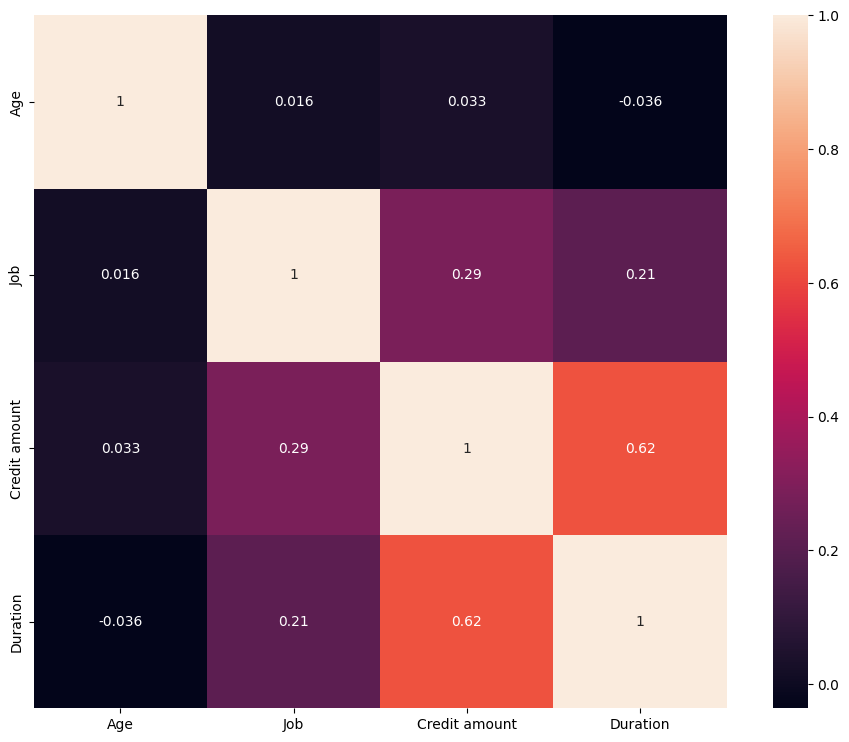

In [ ]:
#correlation matrix for numerical data

corrmat = Credit_data[["Age","Job","Credit amount","Duration"]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);

We can see that there is a slight positive correlation between the credit amount and the loan duration, indicating that higher credit amounts are generally associated with longer loan durations.

##**3) Data Wrangling : Clean and Preprocessing**

### **i) Missing Values**

In [ ]:
Credit_data.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


Missing values are found in "Saving accounts" (183 missing entries) and "Checking account" (394 missing entries). The dataset has a mix of categorical and numerical variables, with categorical columns having a small number of distinct values (e.g., "Sex", "Housing", "Purpose"). Approximately 18.3% of the entries in the "Saving accounts"  and  39.4% of the entries in the "Checking account" column are missing. These missing values represent significant portions of the data in both columns, especially for "Checking account" with nearly 40% of entries missing.
By replacing the missing values with "Unknown," we can retain all the rows and ensure that the missing data is handled in a way that doesn't impact the overall analysis or model training.

In [ ]:
# Replacing missing values by Unknown
Credit_data["Saving accounts"].fillna("Unknown", inplace=True)
Credit_data["Checking account"].fillna("Unknown", inplace=True)

Credit_data.isnull().sum()

<ipython-input-303-93a8a22c2321>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Credit_data["Saving accounts"].fillna("Unknown", inplace=True)
<ipython-input-303-93a8a22c2321>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


### **ii) Duplicates**

In [ ]:
# Checking for duplicates
duplicates = Credit_data.duplicated()
print(duplicates.sum())

0


We can see that there'is no duplicated rows in our dataset.

### **iii) Summary Statistics**

In [ ]:
#summary of the data
Credit_data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


The Age of credit applicants averages 35.5 years, with a range from 19 to 75 years. We can say that applicants must have the age of majority. Most applicants are between 27 and 42 years old, suggesting a middle-aged majority.

The Job feature shows that most applicants are either skilled or highly skilled, with a mean value of 1.90 on a scale from 0 to 3. Few applicants are unskilled (value 0) or highly qualified (value 3).

For the Credit Amount, the average requested is 3,271.26 units, but values vary widely, from 250 to 18,424 units. Most applicants request between 1,365 and 3,972 units.

The Duration of loans averages 20.9 months, with most applicants seeking loans between 12 and 24 months. Loan durations range from 4 to 72 months, indicating diverse preferences for loan length.

In summary, the dataset shows a broad range of applicants with different ages, job types, credit amounts, and loan durations, highlighting the diversity of financial needs.

## **4) Data visualization**

### **i) Univariate analysis**

**R1 - Histogram for numerical variable**

We'll create a simple histogram for the "Age" column to visualize its distribution.

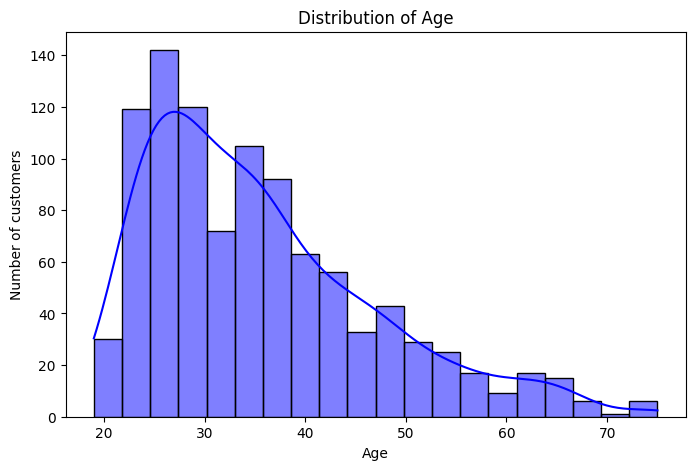

In [ ]:

# Histogram for Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(Credit_data['Age'], bins=20, kde=True, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

The histogram illustrates the age distribution in the dataset, with the x-axis representing age and the y-axis representing frequency. The distribution is right-skewed, indicating a larger proportion of individuals with lower ages compared to higher ages, with the majority falling between 25 and 40 years old. The distribution peaks around 28 years old, the most frequent age in the dataset, and declines as age increases, highlighting a younger demographic. This pattern may suggest a population or sample dominated by young adults, potentially reflecting characteristics such as a company’s hiring practices, a target market focused on younger individuals, or specific demographic traits of a particular geographical region. The histogram offers valuable insights into the trends and dynamics of the group represented in the data.

**R2 - Countplot for categorical variable (Sex)**

Next, We'll plot a countplot for the 'sex' category, showing the distribution of individuals based on their sex in the dataset

<ipython-input-307-59d87602ea03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Credit_data['Sex'], palette="pastel")


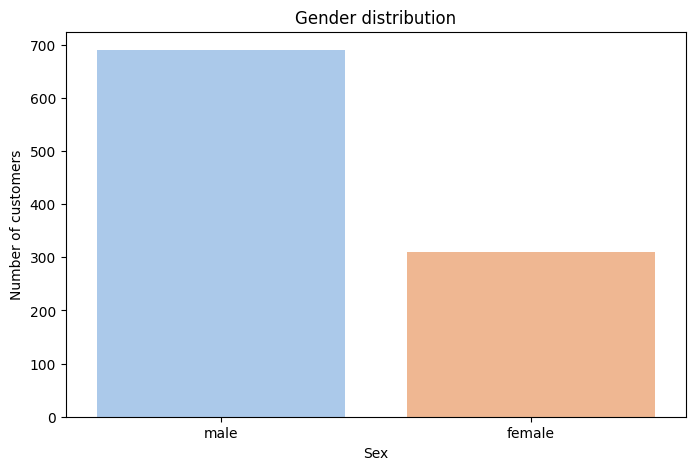

In [ ]:
# R2: Countplot for categorical variable (Sex)
plt.figure(figsize=(8, 5))
sns.countplot(x=Credit_data['Sex'], palette="pastel")
plt.title("Gender distribution")
plt.xlabel("Sex")
plt.ylabel("Number of customers")
plt.show()

In [ ]:
Credit_data["Sex"].value_counts()

,count
Sex,
male,690
female,310


This  shows that Males make up 69% of the dataset, while females account for the remaining 31%. This imbalance could be reflective of the data collection process, the demographic being studied, or a gender-specific pattern in the context of credit applications.  It may suggest that males are more likely to apply for credit or are more represented in the organization’s client base.

**R3 - Grouped-Data countplot**

For the grouped-data countplot, let's group 'Saving accounts' into broader categories. We'll define groups:

- "**little**" remains as it is.

- "**moderate**", "**quite rich**", and "**rich**" are grouped as "**above average**".

The purpose of this grouping is to simplify and provide a clearer overview of the savings distribution by reducing the number of distinct categories. While the original dataset had four categories for saving accounts ('little', 'moderate', 'quite rich', and 'rich'), combining the last three into a broader category called 'above average' helps emphasize the contrast between individuals with minimal savings and those with more substantial savings.

This approach improves interpretability by focusing on a key comparison: those with limited savings ('little') versus those with moderate to significant savings ('above average'). It also reduces noise in the visualization, making patterns and trends easier to identify and communicate effectively to the audience.

<ipython-input-309-c86fdfaa51f8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Credit_data, x='Saving accounts (Grouped)', palette='muted', order=['little', 'above average'])


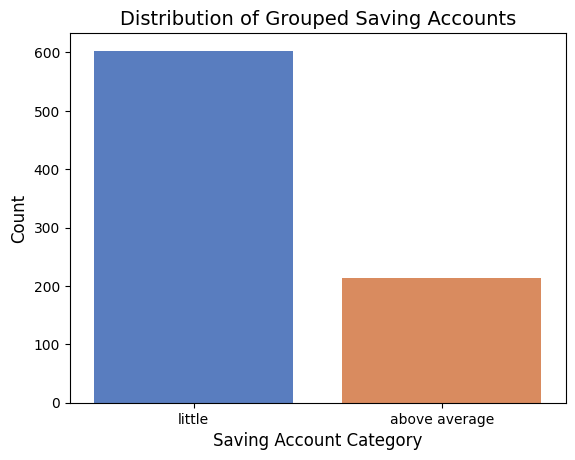

In [ ]:
#Grouped-Data Countplot for 'Saving accounts'
# Define the new grouping for 'Saving accounts'
Credit_data['Saving accounts (Grouped)'] = Credit_data['Saving accounts'].replace({
    'quite rich': 'above average',
    'rich': 'above average',
    'moderate': 'above average'
})

sns.countplot(data=Credit_data, x='Saving accounts (Grouped)', palette='muted', order=['little', 'above average'])
plt.title('Distribution of Grouped Saving Accounts', fontsize=14)
plt.xlabel('Saving Account Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The chart illustrates the distribution of grouped savings accounts across two categories: "little" and "above average." It is evident that the majority of savings accounts are classified in the "little" category, as shown by the substantially higher count of accounts in that category compared to the "above average" category. This suggests that most individuals have savings accounts with lower balances, while fewer people hold accounts with above-average balances. The distribution is not balanced but instead shows a heavy skew towards the "little" category, indicating a clear disparity in the savings account sizes within the dataset.

### **ii) Bivariate analysis**

In this section, we will perform bivariate analysis to examine the relationships between categorical variables in the dataset.

***R4 - Comparison of savings levels by gender***

First, we will analyze the distribution of saving accounts by gender, which involves comparing two categories: 'male' and 'female'. Then, we will explore how the distribution of saving accounts varies across different gender, ordered by increasing level of saving (little , moderate, quite rich and rich). This will help us understand if there are any patterns or trends in saving behaviors based on gender.

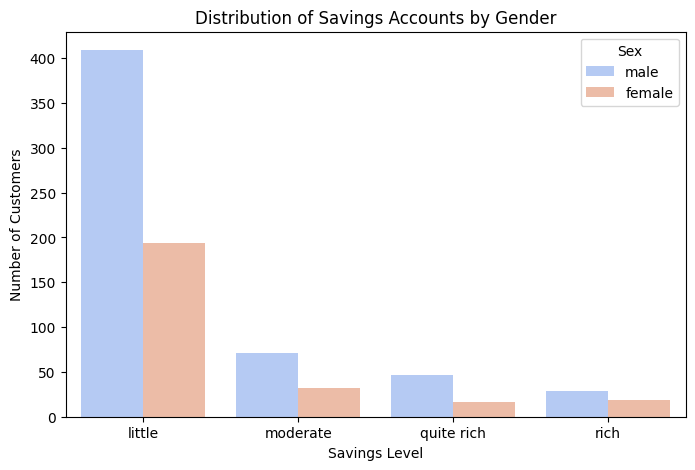

In [ ]:
# Plot for the Comparison of savings levels by gender

# Define the order of the savings levels
savings_order = ['little', 'moderate', 'quite rich', 'rich']
Credit_data['Saving accounts'] = pd.Categorical(Credit_data['Saving accounts'], categories=savings_order, ordered=True)

# Create the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x="Saving accounts", hue="Sex", data=Credit_data, palette="coolwarm")
plt.title("Distribution of Savings Accounts by Gender")
plt.xlabel("Savings Level")
plt.ylabel("Number of Customers")
plt.legend(title="Sex")
plt.show()


"Little" Savings: Males have a significantly higher number of savings accounts compared to females in the "little" savings category.
"Quite Rich" Savings: Males have a higher number of savings accounts than females in the "quite rich" savings category.
"Rich" Savings: Males have a slightly higher number of savings accounts than females in the "rich" savings category.
"Moderate" Savings: Males have a higher number of savings accounts than females in the "moderate" savings category.
Overall: The chart suggests that across all savings levels, males tend to have a higher number of savings accounts compared to females. This may be due to data imbalance.

**Chi-squared test**

In [ ]:
# Cross-tabulation
sex_savings_ct = pd.crosstab(Credit_data['Sex'], Credit_data['Saving accounts'])
print("Cross-tabulation between Sex and Saving accounts:")
print(sex_savings_ct)

# Chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(sex_savings_ct)
print(f"Chi-squared Test result: p-value = {p}")

Cross-tabulation between Sex and Saving accounts:
Saving accounts  little  moderate  quite rich  rich
Sex                                                
female              194        32          16    19
male                409        71          47    29
Chi-squared Test result: p-value = 0.4607448655941626


The p-value from the Chi-squared test is 0.3822, which is greater than 0.05. This suggests that there is no statistically significant relationship between Sex and Saving accounts in this dataset. In other words, the distribution of saving account categories  does not significantly differ between males and females.

***R5 - Comparison of housing types according to employment***

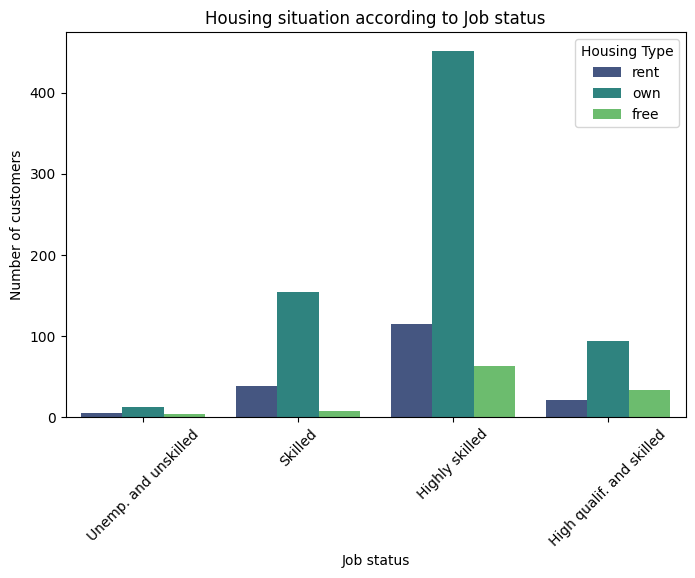

In [ ]:
#Plot to Compare the housing types according to employment (job)
# Replace integer values with descriptive labels
job_labels = {0: 'Unemp. and unskilled', 1: 'Skilled', 2: 'Highly skilled', 3: 'High qualif. and skilled'}

plt.figure(figsize=(8, 5))
sns.countplot(x="Job", hue="Housing", data=Credit_data, palette="viridis")
plt.title("Housing situation according to Job status")
plt.xlabel("Job status")
plt.ylabel("Number of customers")
plt.legend(title="Housing Type")

# Set the x-ticks to the job descriptions
plt.xticks(ticks=range(4), labels=[job_labels[i] for i in range(4)], rotation=45)

plt.show()

* <u>**Housing Type:**</u>

Rent: Most people rent their homes, with the highest number being those with highly skilled jobs.
Own: The number of people who own their homes is relatively low, with the highest number being those with highly skilled jobs.
Free: The number of people who live for free is very low across all job status categories.

* **<u>Job Status:</u>**

Unemployed and unskilled: This group has the lowest number of people in all housing types.
Skilled: This group has a higher number of people who own their homes compared to the unemployed and unskilled group.
Highly skilled: This group has the highest number of people in all housing types.
High Qualified and Skilled: This group has a similar number of people who own their homes as the Skilled group but a lower number of people who rent their homes.

**R6 - Scatter plot for correlation between Age and Credit Amount**

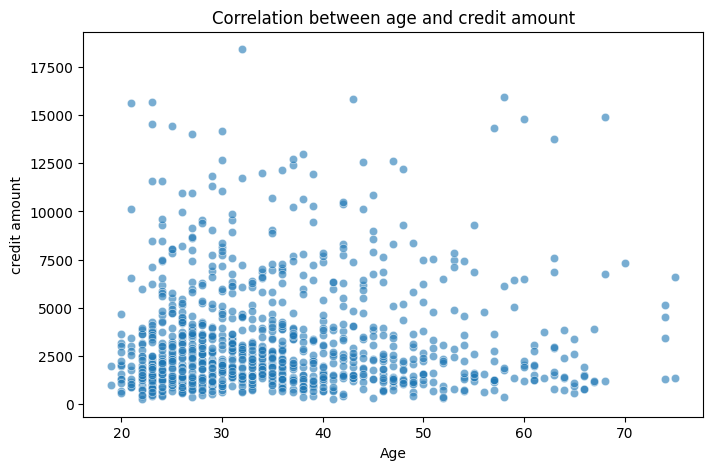

In [ ]:
#scatter plot to visualize the correlation between age and credit amount.
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Credit_data['Age'], y=Credit_data['Credit amount'], alpha=0.6)
plt.title("Correlation between age and credit amount")
plt.xlabel("Age")
plt.ylabel("credit amount")
plt.show()

The scatter plot shows a weak positive correlation between age and credit amount. This means that as age increases, there is a slight tendency for the credit amount to increase as well, but the relationship is not strong.
There is a large amount of variation in the credit amount at each age. This means that age is not a very good predictor of credit amount.
There are a few outliers in the data, particularly at higher credit amounts. This suggests that there may be other factors influencing the credit amount besides age. Overall, the scatter plot suggests that age is not a strong predictor of credit amount. There is a slight positive correlation, but the relationship is weak and there is a lot of variation in the data. Other factors likely play a more significant role in determining the credit amount.

***R7 - Exploring credit duration based on loan types***


<ipython-input-314-fc51d3e02677>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Purpose", y="Duration", data=Credit_data, palette="Set2")


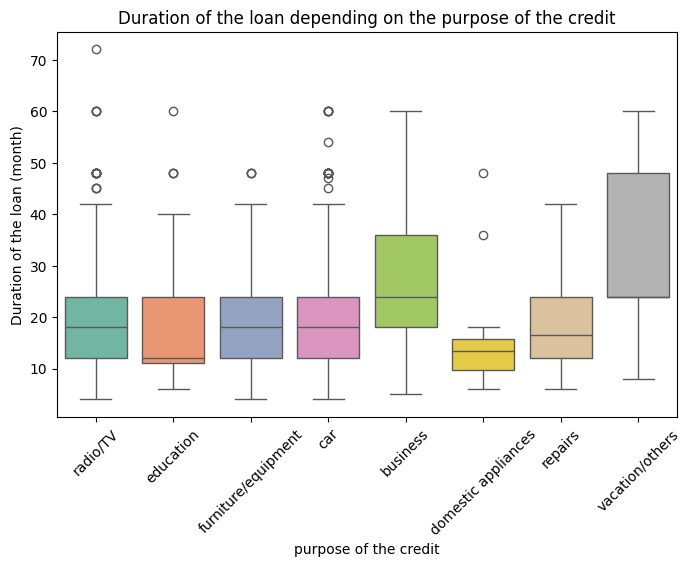

In [ ]:
# A box plot to visualize the duration of loans based on the purpose of the credit
plt.figure(figsize=(8, 5))
sns.boxplot(x="Purpose", y="Duration", data=Credit_data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Duration of the loan depending on the purpose of the credit")
plt.xlabel("purpose of the credit")
plt.ylabel("Duration of the loan (month)")
plt.show()

The loan duration for business and vacation/others are significantly longer than for other purposes.

The loan duration for radio/TV, education, furniture/equipment, and domestic appliances are relatively short.

There are some outliers in the data, particularly for radio/TV, car, and vacation/others. This suggests that some individuals took out loans for these purposes with durations significantly longer or shorter than the average.

## Additional Insights and Associated Evidences

<ipython-input-315-b9c0b2cb2cc7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Credit_data, x='Job (Labeled)', y='Credit amount', palette='viridis',


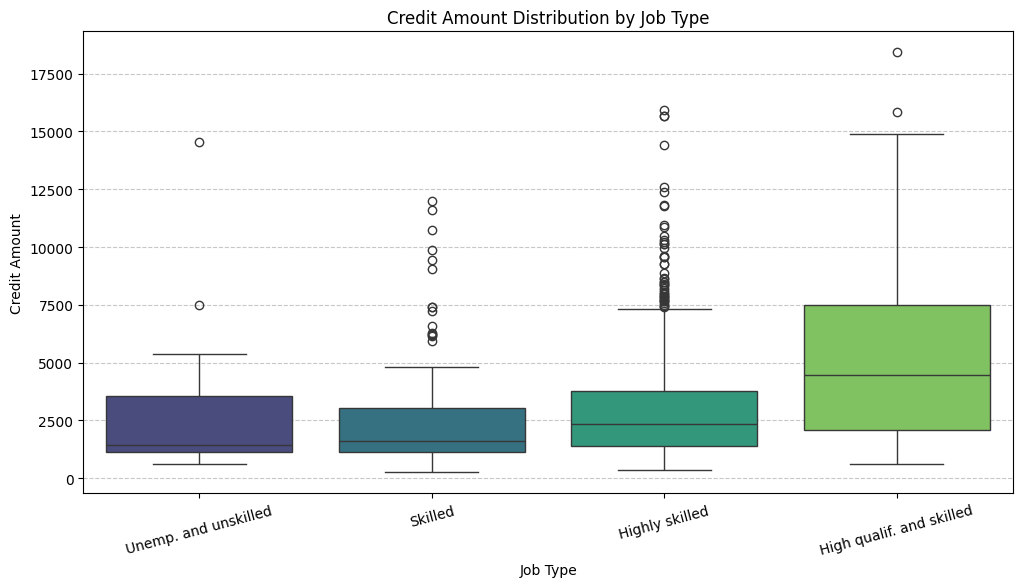

In [ ]:
Credit_data['Job (Labeled)'] = Credit_data['Job'].replace({
    0: 'Unemp. and unskilled',
    1: 'Skilled',
    2: 'Highly skilled',
    3: 'High qualif. and skilled'
})
# Plot credit amount by job description
plt.figure(figsize=(12, 6))
sns.boxplot(data=Credit_data, x='Job (Labeled)', y='Credit amount', palette='viridis',
            order=['Unemp. and unskilled', 'Skilled', 'Highly skilled', 'High qualif. and skilled'])
plt.title("Credit Amount Distribution by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Credit Amount")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-316-403d8df9a822>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Credit_data, x='Checking account', y='Credit amount', palette='viridis',


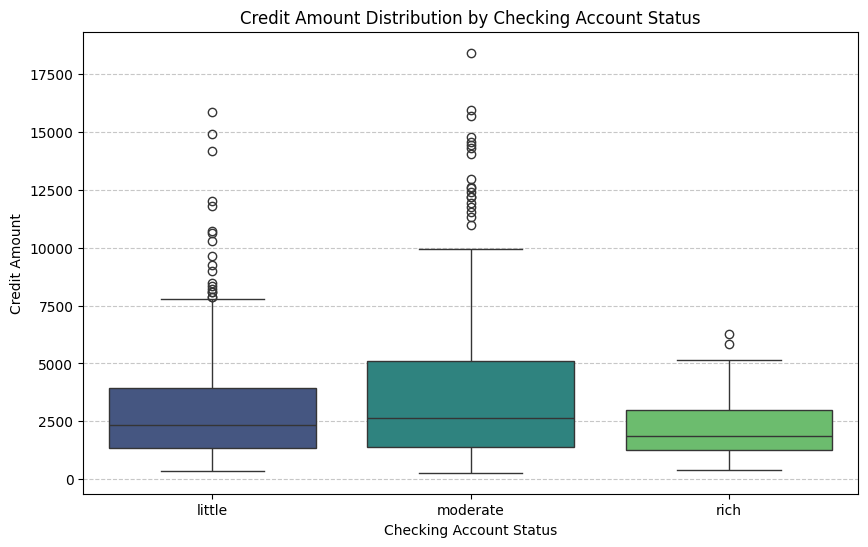

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Credit_data, x='Checking account', y='Credit amount', palette='viridis',
            order=['little', 'moderate', 'rich'])
plt.title("Credit Amount Distribution by Checking Account Status")
plt.xlabel("Checking Account Status")
plt.ylabel("Credit Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

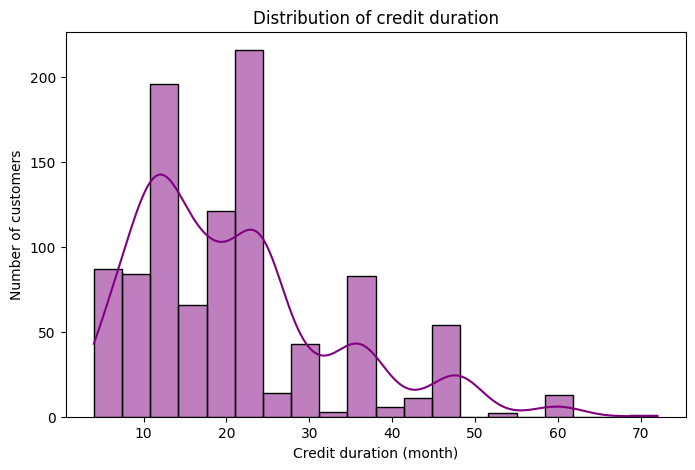

In [ ]:
# Distribution of credit duration
plt.figure(figsize=(8, 5))
sns.histplot(Credit_data['Duration'], bins=20, kde=True, color='purple')
plt.title("Distribution of credit duration")
plt.xlabel("Credit duration (month)")
plt.ylabel("Number of customers")
plt.show()

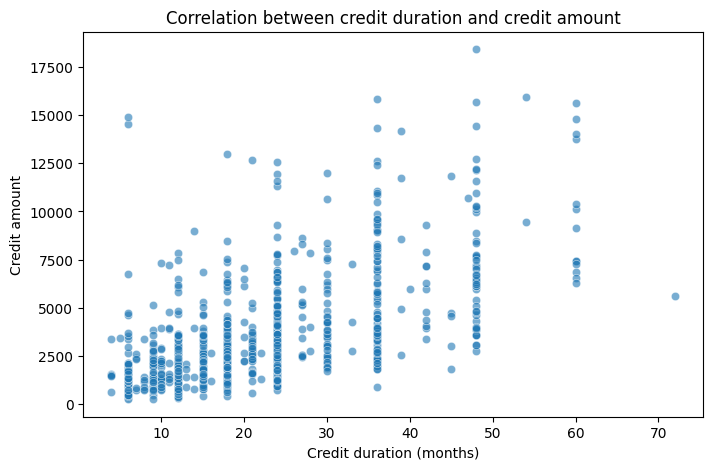

In [ ]:
# Relationship between credit duration and amount borrowed
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Credit_data['Duration'], y=Credit_data['Credit amount'], alpha=0.6)
plt.title("Correlation between credit duration and credit amount")
plt.xlabel("Credit duration (months)")
plt.ylabel("Credit amount")
plt.show()


<ipython-input-319-4005acae4636>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Credit_data['Checking account'], y=Credit_data['Duration'], palette="coolwarm")


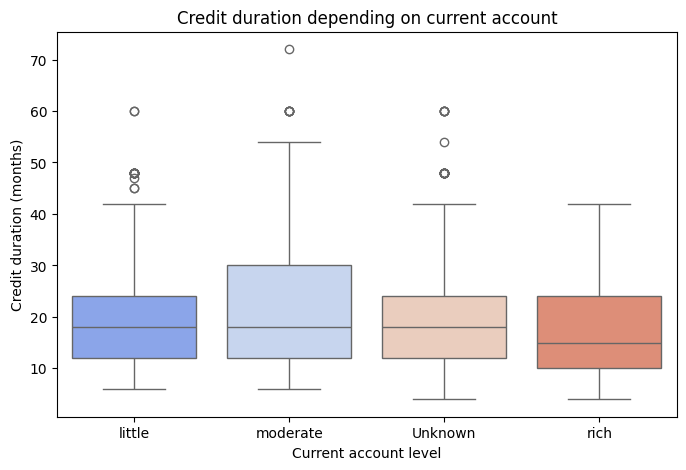

In [ ]:
# Relationship between current account and credit duration
plt.figure(figsize=(8, 5))
sns.boxplot(x=Credit_data['Checking account'], y=Credit_data['Duration'], palette="coolwarm")
plt.title("Credit duration depending on current account")
plt.xlabel("Current account level")
plt.ylabel("Credit duration (months)")
plt.show()

## Summary of Insights derived from the Dataset I

The exploratory analysis of the German Credit Dataset has uncovered several key trends and insights that highlight the financial behavior of credit applicants. These findings can inform both data-driven decision-making and strategies for credit risk assessment. Below are 10 notable insights derived from the analysis:

1. The majority of customers fall between 25-35 years of age, with a right-skewed age distribution.

2. Men represent a slightly higher proportion of borrowers compared to women.

3. A weak positive correlation exists between age and the credit amount requested.

4. Most customers own their homes, which is often considered a reassuring factor for lenders.

5. Customers with small or no savings accounts tend to borrow larger amounts.

6. People with stable employment (highly qualified and skilled) are more likely to request larger loans.

7. Customers with well-funded checking accounts generally borrow smaller amounts.
8. Most loans have a term of 12 to 24 months, representing a common preference for medium-term loans.

9. Customers with well-stocked checking accounts are more likely to take out shorter-term loans.
10. Longer-term loans are generally associated with larger credit amounts.
These findings provide actionable insights for data analysts and financial risk managers to better understand the dynamics of creditworthiness and lending risk.



---



# **B/ Dataset II : Diabetes**
<br><u>**Introduction:**</u></br>


This exploratory data analysis (EDA) examines the **Diabetes Health Indicators Dataset**, which contains behavioral, demographic, and medical factors associated with diabetes risk. The goal of this analysis is to uncover patterns, relationships, and potential predictors of diabetes within the dataset. By leveraging statistical insights and visualizations, we aim to identify key health indicators that may contribute to diabetes risk. This report is intended for **health professionals, policymakers, and data analysts** interested in understanding diabetes-related trends to inform preventive strategies and public health interventions.

## **1) Data Overview**

In [ ]:
repo_url = "https://raw.githubusercontent.com/yacinedjido2003/CSI4142-W25-Datasets/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv"
diabetes_data = pd.read_csv(repo_url)

diabetes_data # An initial glimpse of the dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## **2) Dataset Description**

###### **- Dataset Name & Purpose**  
The dataset, [**Diabetes Health Indicators Dataset**](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv), was created by **Alex Teboul** from Kaggle and is derived from the Behavioral Risk Factor Surveillance System (BRFSS) of the US Centers for Disease Control and Prevention (CDCP). It was designed to help analyze health behaviors and risk factors associated with diabetes, with the goal of aiding public health research and preventative strategies.<br></br>

###### **- Dataset Shape**  
The dataset consists of **253,680 rows** and **22 columns**, representing various demographic, behavioral, and medical health indicators.<br></br>

###### **- Feature List & Descriptions**  
The dataset includes the following features:  

| Feature Name                 | Description | Data Type |
|------------------------------|------------|-----------|
| **Diabetes_binary** | Indicates whether the individual has diabetes (1) or not (0) | Categorical (Binary) |
| **HighBP** | High blood pressure diagnosis (1 = Yes, 0 = No) | Categorical (Binary) |
| **HighChol** | High cholesterol diagnosis (1 = Yes, 0 = No) | Categorical (Binary) |
| **CholCheck** | Cholesterol check in the last 5 years (1 = Yes, 0 = No) | Categorical (Binary) |
| **BMI** | Body Mass Index | Numerical |
| **Smoker** | Has the individual smoked at least 100 cigarettes in their lifetime? (1 = Yes, 0 = No) | Categorical (Binary) |
| **Stroke** | History of stroke (1 = Yes, 0 = No) | Categorical (Binary) |
| **HeartDiseaseorAttack** | History of heart disease or attack (1 = Yes, 0 = No) | Categorical (Binary) |
| **PhysActivity** | Engages in physical activity other than work (1 = Yes, 0 = No) | Categorical (Binary) |
| **Fruits** | Consumes fruit daily (1 = Yes, 0 = No) | Categorical (Binary) |
| **Veggies** | Consumes vegetables daily (1 = Yes, 0 = No) | Categorical (Binary) |
| **HvyAlcoholConsump** | Heavy alcohol consumption (Men >14 drinks/week, Women >7 drinks/week) (1 = Yes, 0 = No) | Categorical (Binary) |
| **AnyHealthcare** | Has health insurance or access to healthcare (1 = Yes, 0 = No) | Categorical (Binary) |
| **NoDocbcCost** | Unable to see a doctor due to cost (1 = Yes, 0 = No) | Categorical (Binary) |
| **GenHlth** | General health rating (1 = Excellent, 5 = Poor) | Categorical (Ordinal) |
| **MentHlth** | Number of days mental health was not good in the past 30 days | Numerical |
| **PhysHlth** | Number of days physical health was not good in the past 30 days | Numerical |
| **DiffWalk** | Difficulty walking (1 = Yes, 0 = No) | Categorical (Binary) |
| **Sex** | Biological sex (1 = Male, 0 = Female) | Categorical (Binary) |
| **Age** | Age category (13 levels: 1 = 18-24, 2 = 25-29, ..., 13 = 80+) | Categorical (Ordinal) |
| **Education** | Education level (1 = No school, 6 = College graduate) | Categorical (Ordinal) |
| **Income** | Income level (1 = Low, 8 = High) | Categorical (Ordinal) |

##**3) Data Wrangling : Cleaning and Processing**

### **i) Data transformation**

As observed when overviewing the data and the dictionary definitions, all the columns of the dataset contain numeric values (including the qualitative ones with categories associated with each value). In order to improve the interpretability of the results of our upcoming exploratory data analysis, we are going to transform these numerical values and map them with the corresponding categories for the qualitative columns which are not binary (0="No"/1="Yes").

In [ ]:
category_mappings = {
    "GenHlth": {1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"},
    "Sex": {0: "Female", 1: "Male"},
    "Age": {1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39", 5: "40-44", 6: "45-49",
        7: "50-54", 8: "55-59", 9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79", 13: "80+"},
    "Education": {1: "No School/Kindergarten", 2: "Elementary", 3: "Some High School", 4: "High School Graduate",
        5: "Some College", 6: "College Graduate"},
    "Income": {1: "< $10,000", 2: "$10,000-$15,000", 3: "$15,000-$20,000", 4: "$20,000-$25,000",
        5: "$25,000-$35,000", 6: "$35,000-$50,000", 7: "$50,000-$75,000", 8: "$75,000+"
    }
}

# Mappings application to the dataset
for column, mapping in category_mappings.items():
    if column in diabetes_data.columns:
        diabetes_data[column] = diabetes_data[column].map(mapping)

# Glimpse of the dataset with transformed columns
diabetes_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Poor,18.0,15.0,1.0,Female,60-64,High School Graduate,"$15,000-$20,000"
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,Good,0.0,0.0,0.0,Female,50-54,College Graduate,"< $10,000"
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,Poor,30.0,30.0,1.0,Female,60-64,High School Graduate,"$75,000+"
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very Good,0.0,0.0,0.0,Female,70-74,Some High School,"$35,000-$50,000"
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very Good,3.0,0.0,0.0,Female,70-74,Some College,"$20,000-$25,000"


### **ii) Missing Values**

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  object 
 15  

We can observe from the above output that all the 22 features of the dataset contain a value in each 253 680 rows. Therefore the data is complete and there is not any missing value to deal with for this second set.

### **iii) Duplicates**

In [ ]:
# Duplicates test
duplicates = diabetes_data[diabetes_data.duplicated()]
print(f"Total duplicate rows: {duplicates.shape[0]}")

Total duplicate rows: 24206


Despite having no missing values, this data set appears to contain many duplicate records.

Let's investigate this further by trying to observe these duplicates.

In [ ]:
duplicates

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Poor,0.0,30.0,1.0,Female,65-69,High School Graduate,"$25,000-$35,000"
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Excellent,0.0,0.0,0.0,Female,35-39,College Graduate,"$75,000+"
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very Good,0.0,0.0,0.0,Female,40-44,College Graduate,"$75,000+"
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Excellent,0.0,0.0,0.0,Female,35-39,College Graduate,"$75,000+"
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Excellent,0.0,0.0,0.0,Male,60-64,College Graduate,"$75,000+"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,Male,60-64,College Graduate,"$35,000-$50,000"
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Excellent,0.0,0.0,0.0,Female,50-54,College Graduate,"$75,000+"
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very Good,0.0,0.0,0.0,Male,55-59,College Graduate,"$75,000+"
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Very Good,0.0,0.0,0.0,Female,40-44,College Graduate,"$75,000+"


Let's now check only the signature vector of the duplicates and their respective count in the dataset.

In [ ]:
duplicate_counts = duplicates.groupby(duplicates.columns.tolist(), as_index=False).size()
duplicate_counts.rename(columns={'size': 'Duplicate_Count'}, inplace=True)
duplicate_counts = duplicate_counts.sort_values(by="Duplicate_Count", ascending=False)

duplicate_counts

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Duplicate_Count
643,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Excellent,0.0,0.0,0.0,Female,45-49,College Graduate,"$75,000+",58
1686,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Excellent,0.0,0.0,0.0,Female,45-49,College Graduate,"$75,000+",54
1694,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Excellent,0.0,0.0,0.0,Female,50-54,College Graduate,"$75,000+",52
1094,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Excellent,0.0,0.0,0.0,Female,45-49,College Graduate,"$75,000+",51
637,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Excellent,0.0,0.0,0.0,Female,40-44,College Graduate,"$75,000+",51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Excellent,0.0,0.0,0.0,Female,30-34,Some College,"$50,000-$75,000",1
4887,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Very Good,0.0,0.0,0.0,Female,60-64,Some College,"$50,000-$75,000",1
4886,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Very Good,0.0,0.0,0.0,Male,50-54,High School Graduate,"$75,000+",1
4885,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,Excellent,0.0,0.0,0.0,Male,65-69,College Graduate,"$75,000+",1


Looking closely at the data from the duplicate recordings, we can better understand why we have such a high value. Apart from BMI, MentHlth and PhysHlth, which are numeric (continuous) attributes, the other 19 columns in the dataset correspond to categorical variables that can only take on a few values/categories. What's more, from these 19 columns, 15 attributes are binary variables. Thus, some of the tuples in such a large dataset end up having the same signature (identic values for each attribute => duplicates).

Another possible expalantion, could be that these duplicates are the result of an error in the data collection and/or preparation processes.

### **iv) Summary Statistics**

Let's now take a look at some essential descriptive statistics about the distribution of the dataset's features.

In [ ]:
diabetes_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,3.184772,4.242081,0.168224
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,7.412847,8.717951,0.374066
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000


Here are some key insights from the summary statistics of our dataset:  

##### **1) Prevalence of Diabetes (Target Variable)**
- The **mean** of `Diabetes_binary` is **0.139**, meaning about **13.9% of individuals have diabetes or prediabetes**.
- The **median (50%) is 0**, suggesting that the majority of the population does not have diabetes.  

##### **2) Blood Pressure & Cholesterol**
- **42.9% of individuals have high blood pressure (`HighBP`)**, and **42.4% have high cholesterol (`HighChol`)**.
- Almost **96% of individuals have had their cholesterol checked in the past 5 years (`CholCheck`)**, showing good preventive health behavior.  

##### **3️) BMI Distribution**
- **Average BMI is 28.38**, which is close to the **overweight threshold (25-29.9)**, and the **max is 98**, indicating some extreme outliers.
- The **75th percentile is 31**, meaning at least **25% of individuals are classified as obese (BMI ≥30)**.  

##### **4️) Lifestyle & Habits**
- **44.3% of individuals are smokers (`Smoker`)**, which is relatively high.
- **Only 75.6% engage in physical activity (`PhysActivity`)**, leaving about a **quarter of the population inactive**.
- **Fruits (`63.4%`) and vegetables (`81.1%`) consumption is relatively high**, suggesting a generally healthy diet.  
- **5.6% of individuals are heavy alcohol consumers (`HvyAlcoholConsump`)**, a relatively small percentage.  

##### **5️) Health Conditions**
- **4% of individuals reported having had a stroke (`Stroke`)**, while **9.4% reported a history of heart disease or attack (`HeartDiseaseorAttack`)**.
- **16.8% have difficulty walking (`DiffWalk`)**, which could indicate mobility issues related to aging or chronic diseases.  

##### **6️) Healthcare Access**
- **95.1% have some form of healthcare coverage (`AnyHealthcare`)**, indicating high healthcare accessibility.
- **8.4% could not see a doctor due to cost (`NoDocbcCost`)**, suggesting financial barriers still exist.  

##### **7️) General & Mental Health**
- **General health (`GenHlth`)** leans towards the **"Good" to "Fair" range (median = 3)**.
- **Median mental health (`MentHlth`) and physical health (`PhysHlth`) issues are 0 days**, meaning most people report **no significant issues**.
- However, the **mean mental health issue days is 3.18 and physical health issue days is 4.24**, suggesting a subset of the population suffers from chronic conditions.  

#####<u>**Key Takeaways:**</u>
- **Diabetes prevalence is moderate (13.9%)**, but factors like **high BMI, high blood pressure, smoking, and lack of physical activity** could be contributing factors.  
- **Heart disease and stroke are relatively low (~4-9%)**, but mobility issues (16.8%) are more common.  
- **Mental and physical health issues exist but are not widespread**, though outliers skew the data.  
- **Healthcare access is generally good (95.1%), but cost remains a barrier for some (8.4%)**.<br></br>

Let's now jump into visualizing our data and derive these insights through graphs and charts !

## **4) Data Visualization**

### **i) Univariate Analysis**

##### ***R1 - Histogram for Numerical Data Dispersion***
We will create a histogram to visualize the distribution of **BMI** since it is a continuous numerical variable. This will help us understand visually the range, central tendency, and skewness of BMI values (as observed with the summary statistics computed above).

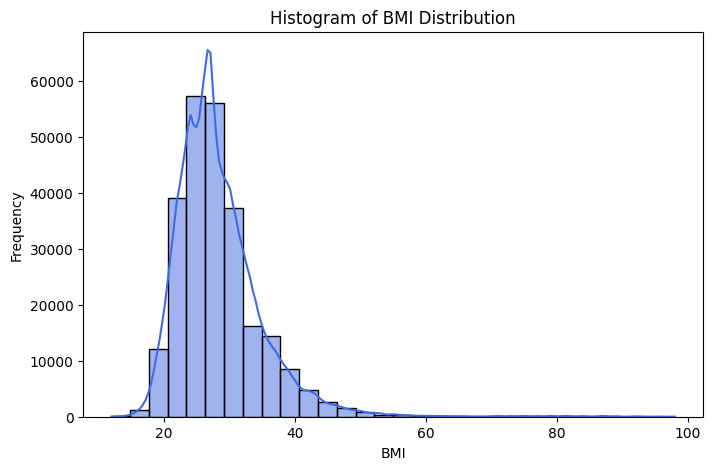

In [ ]:
# Histogram for BMI column
plt.figure(figsize=(8,5))
sns.histplot(diabetes_data['BMI'], bins=30, kde=True, color='royalblue')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI Distribution')
plt.show()


* <u>**Insight 1:**</u> BMI Distribution - **The great majority of individuals in the dataset have a BMI between 20 and 40**.

##### ***R2 - Countplot for a multilabel categorical variable***
For this visualization, we'll plot the histogram of the **GenHlth** categorical variable. It contains multiple (5) classes that and we'll visualize its distribution across these categories through the following graph.

<ipython-input-328-60ac9ba2c140>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GenHlth', data=diabetes_data, order=health_order, palette='Blues')


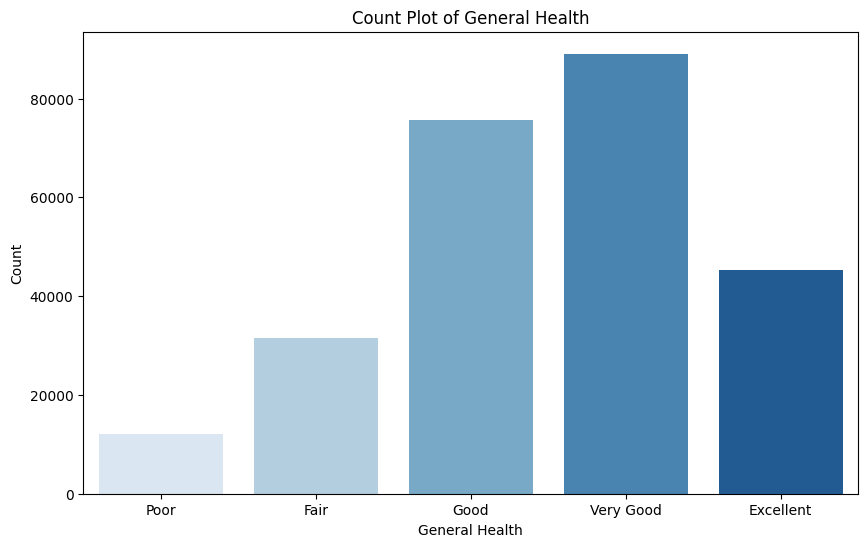

In [ ]:
# Ordinal variable categories sort
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Count plot for the GenHlth multiclass categorical attribute
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', data=diabetes_data, order=health_order, palette='Blues')
plt.title('Count Plot of General Health')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

* <u>**Insight 2:**</u> General Health Distribution - **Individuals in "Good" or "Very Good" general health are predominant in this dataset**. The distribution of the global health of the individuals of this dataset follows, as intuitively expected, a normal distribution with a slightly positive skew (most of the concentration are in the **Good** or **Very Good** categories). We can observe a reasonable amount of data points in Excellent condition and a bit less with a Fair health state. Finally, there is a little samples which reported Poor health conditions.

##### ***R3 - Grouped-Data Countplot***
To do so, we will group some categories (binning) to simplify the visualization.<br>
For example, we can group the Income column into broader categories like '**Low**', '**Medium**', and '**High**'.<br><br>

<u>Groping explanation:</u> Rules applied for grouping/binning

* **Low Income:** "< 10,000" ; "10,000-15,000" ; "15,000 - 20,000"

* **Medium Income:** "20,000−25,000" ; "25,000−35,000" ; "35,000−50,000"

* **High Income:** "50,000−75,000" ; "75,000+"

<ipython-input-329-427fa90d697d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Income_Group', data=diabetes_data, order=['Low', 'Medium', 'High'], palette='Set2')


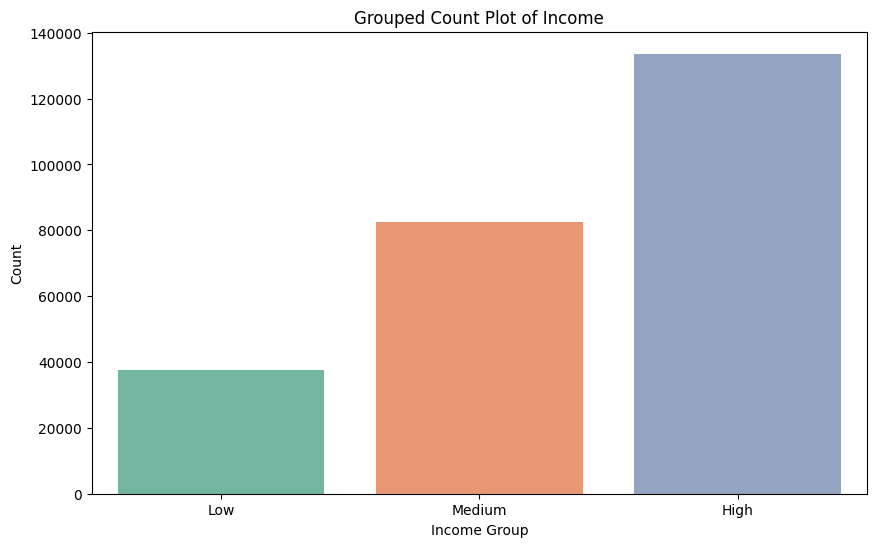

In [ ]:
# Function for the binning
def group_income(income):
    if income in ['< $10,000', '$10,000-$15,000', '$15,000-$20,000']:
        return 'Low'
    elif income in ['$20,000-$25,000', '$25,000-$35,000', '$35,000-$50,000']:
        return 'Medium'
    else:
        return 'High'

diabetes_data['Income_Group'] = diabetes_data['Income'].apply(group_income)

# Count plot for the binned Income attribute
plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Group', data=diabetes_data, order=['Low', 'Medium', 'High'], palette='Set2')
plt.title('Grouped Count Plot of Income')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

<u>**Insight 3:**</u> Income Group Distribution - **The majority of individuals in the dataset fall into the "Low" and "Medium" income groups**. The Grouped Count Plot of Income shows that the "*Low*" and "*Medium*" income groups have a higher count compared to the "*High*" income group.

### **ii) Bivariate Analysis**
In this section, we'll dive into analyzing not only one but two variables simultaneously. We'll look for comparisons and eventual correlations.

##### ***R4 - Comparing categories with 2 values***
To get started with our bivariate analysis, we'll plot 2 binary categorical variables together and study the relationship between one another. To do so, we'll focus for this R4 on the relationship between the response variable (`Diabetes_binary`) and High Blood Pressure (`HighBP`) through the following **stacked/grouped barplot** :

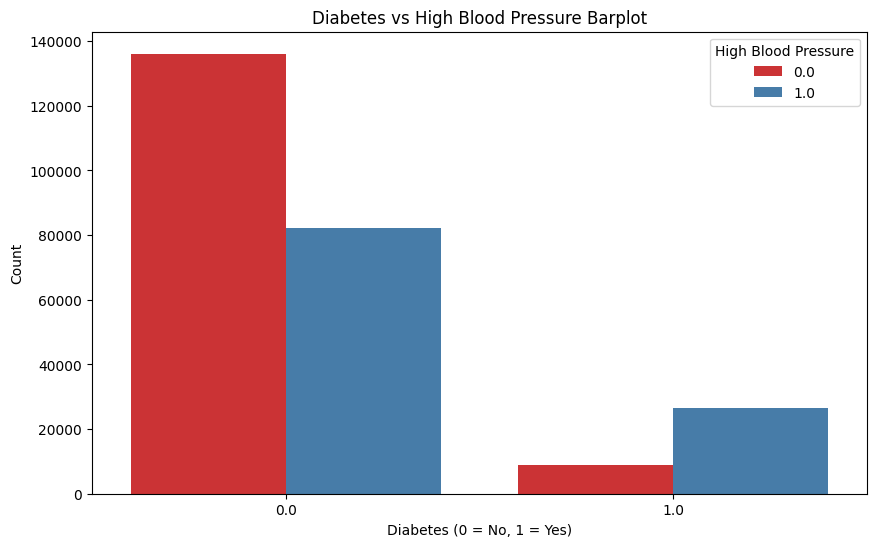

In [ ]:
# Grouped bar plot for Diabetes_binary vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes_binary', hue='HighBP', data=diabetes_data, palette='Set1')
plt.title('Diabetes vs High Blood Pressure Barplot')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='High Blood Pressure')
plt.show()

<u>**Insight 4:**</u> Diabetes Prevalence with High Blood Pressure - **Individuals with high blood pressure are more likely to have diabetes**. The above stacked histogram of Diabetes vs High Blood Pressure shows a higher count of diabetes cases (1) among individuals with high blood pressure (1) compared to those without. This is indicative that high blood pressure can be symptomatic to prediabetes.

##### ***R5 - Comparing categories with more than 2 values***
To pursue the bivariate analysis of our EDA, we'll plot 2 multilabel categorical variables together in order to visualize and interpret their relationship. This being said, we'll plot a heatmap with the GeneralHealth (`GenHlth`) and the `Income_Group` multiclass qualitative variables :

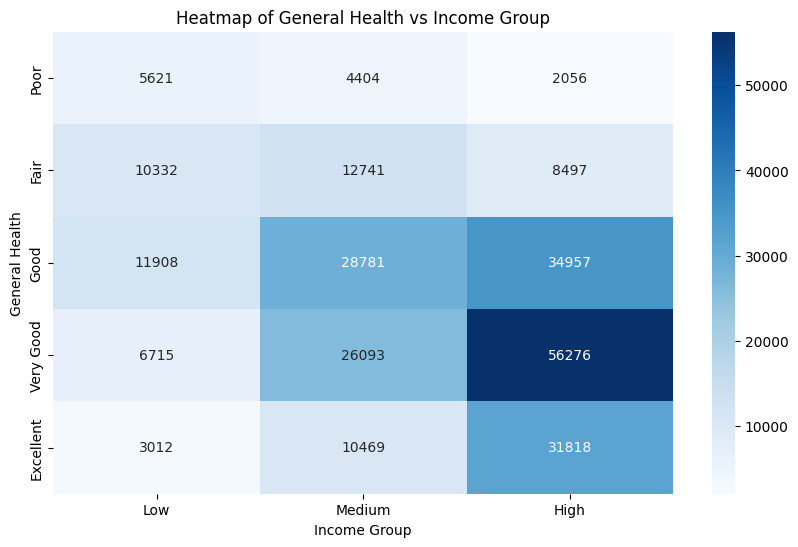

In [ ]:
# Cross-tabulation of GenHlth and Income_Group
cross_tab = pd.crosstab(diabetes_data['GenHlth'], diabetes_data['Income_Group'])

# Order for GenHlth (ordinal variable)
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
cross_tab = cross_tab.loc[health_order]  # Reorder rows based on GenHlth

# Order for Income_Group (ordinal variable)
income_order = ['Low', 'Medium', 'High']
cross_tab = cross_tab[income_order]  # Reorder columns based on Income_Group

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap of General Health vs Income Group')
plt.xlabel('Income Group')
plt.ylabel('General Health')
plt.show()

<u>**Insight 5:**</u> Income and Health Relationship - **Higher income groups tend to report better general health**.The Heatmap of General Health vs Income Group shows that "*Good*", "*Very Good*" and "*Excellent*" health condtions have been more reported in the "*High*"/"*Medium*" income groups, while "*Poor*" and "*Fair*" health are more common in the "*Low*"/"*Medium*" income groups.

##### ***R6 - Scatterplot to visualize correlation between 2 numerical attributes***
We suspect that there should be some linear relation ship between variables such as PhysicalHealth (`PhyHlth`) and MentalHealth (`MentalHlth`). Let's plot the scatter of these two attributes and draw the OLS line to assess that :


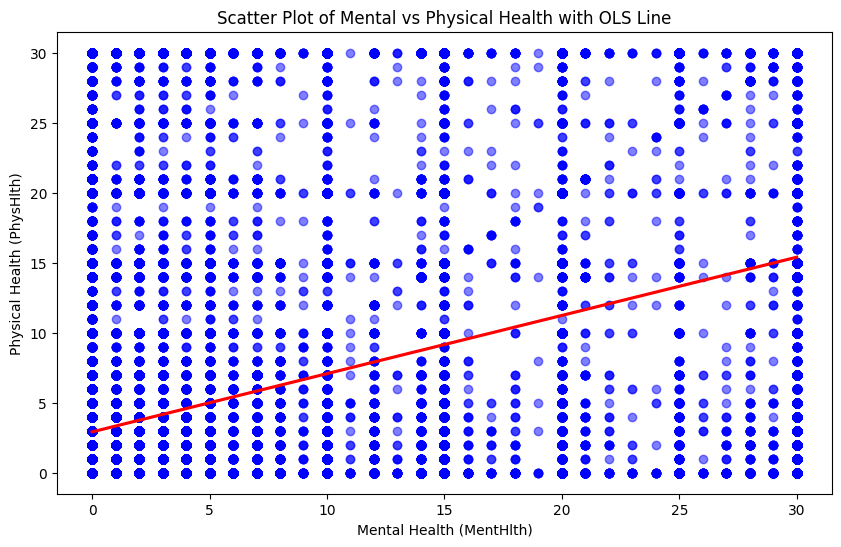

In [ ]:
# Scatter plot with OLS line
plt.figure(figsize=(10, 6))
sns.regplot(x='MentHlth', y='PhysHlth', data=diabetes_data,
            scatter_kws={'alpha': 0.5, 'color': 'blue'},  # Customize scatter points
            line_kws={'color': 'red'},  # Customize regression line
            ci=None)  # Remove confidence interval shading
plt.title('Scatter Plot of Mental vs Physical Health with OLS Line')
plt.xlabel('Mental Health (MentHlth)')
plt.ylabel('Physical Health (PhysHlth)')
plt.show()

<u>**Insight 6:**</u> Correlation Between Physical Health and Mental Health - **Against our initial inuition, there seems to be at most a weak positive correlation between physical health and mental health**. The dispersion of the data points in the scatterplot shows that the two attributes aren't strongly related in the case of this dataset's samples.

##### ***R7 - Scatterplot to visualize correlation between 2 numerical attributes***
To explore the relationship between **Body Mass Index** (`BMI`) and **General Health** (`GenHlth`), we can split the numerical data (`BMI`) by the categorical variable (`GenHlth`texte en gras) to analyze their distributions. By visualizing the data using graphs like a box plots we can assess how BMI varies across different levels of general health. Let's look at this through the following visual :

<ipython-input-333-7d4a7ad77e9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GenHlth', y='BMI', data=diabetes_data, order=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], palette='Set2')


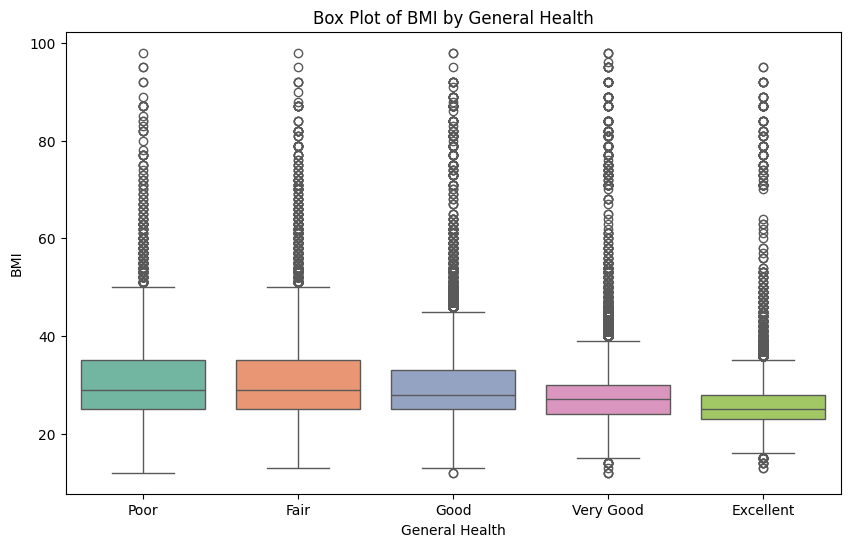

In [ ]:
# Box plot for BMI vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='BMI', data=diabetes_data, order=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], palette='Set2')
plt.title('Box Plot of BMI by General Health')
plt.xlabel('General Health')
plt.ylabel('BMI')
plt.show()

<u>**Insight 7:**</u> BMI Distribution Across General Health Categories - **Individuals with poorer general health tend to have higher BMI values compared to those with better health.**The Box Plot of BMI by General Health shows that the median BMI is highest for the "Poor" health category and decreases progressively for "Fair," "Good," "Very Good," and "Excellent" health.

## Additional Insights

For the remaining insights, we'll visualize some of those derived when studying the summary of descriptive statistics of our dataset. <br><br>

<u>**Insight 8:**</u> Heart disease and stroke are relatively low (~4-9%), but mobility issues (16.8%) are more common.<br>


<ipython-input-334-78707abc830e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=prevalence, palette='Set2')


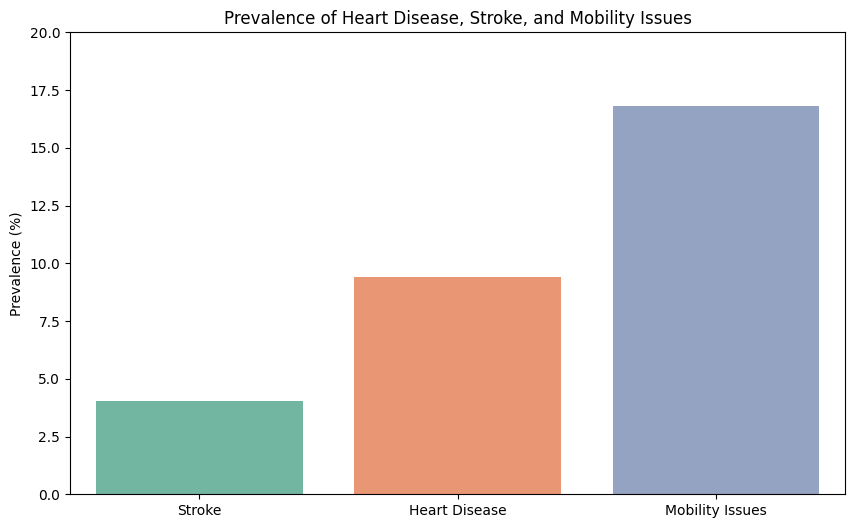

In [ ]:
# Calculate prevalence of heart disease, stroke, and mobility issues
heart_disease_prevalence = diabetes_data['HeartDiseaseorAttack'].mean() * 100
stroke_prevalence = diabetes_data['Stroke'].mean() * 100
mobility_issues_prevalence = diabetes_data['DiffWalk'].mean() * 100

# Data for the grouped bar plot
categories = ['Stroke', 'Heart Disease', 'Mobility Issues']
prevalence = [stroke_prevalence, heart_disease_prevalence, mobility_issues_prevalence]

# Grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=prevalence, palette='Set2')
plt.title('Prevalence of Heart Disease, Stroke, and Mobility Issues')
plt.ylabel('Prevalence (%)')
plt.ylim(0, 20)  # Set y-axis limit to focus on the range
plt.show()

<u>**Insight 9:**</u> Mental and physical health issues exist but are not widespread, though there is many outliers that skew the data's distribution.<br>

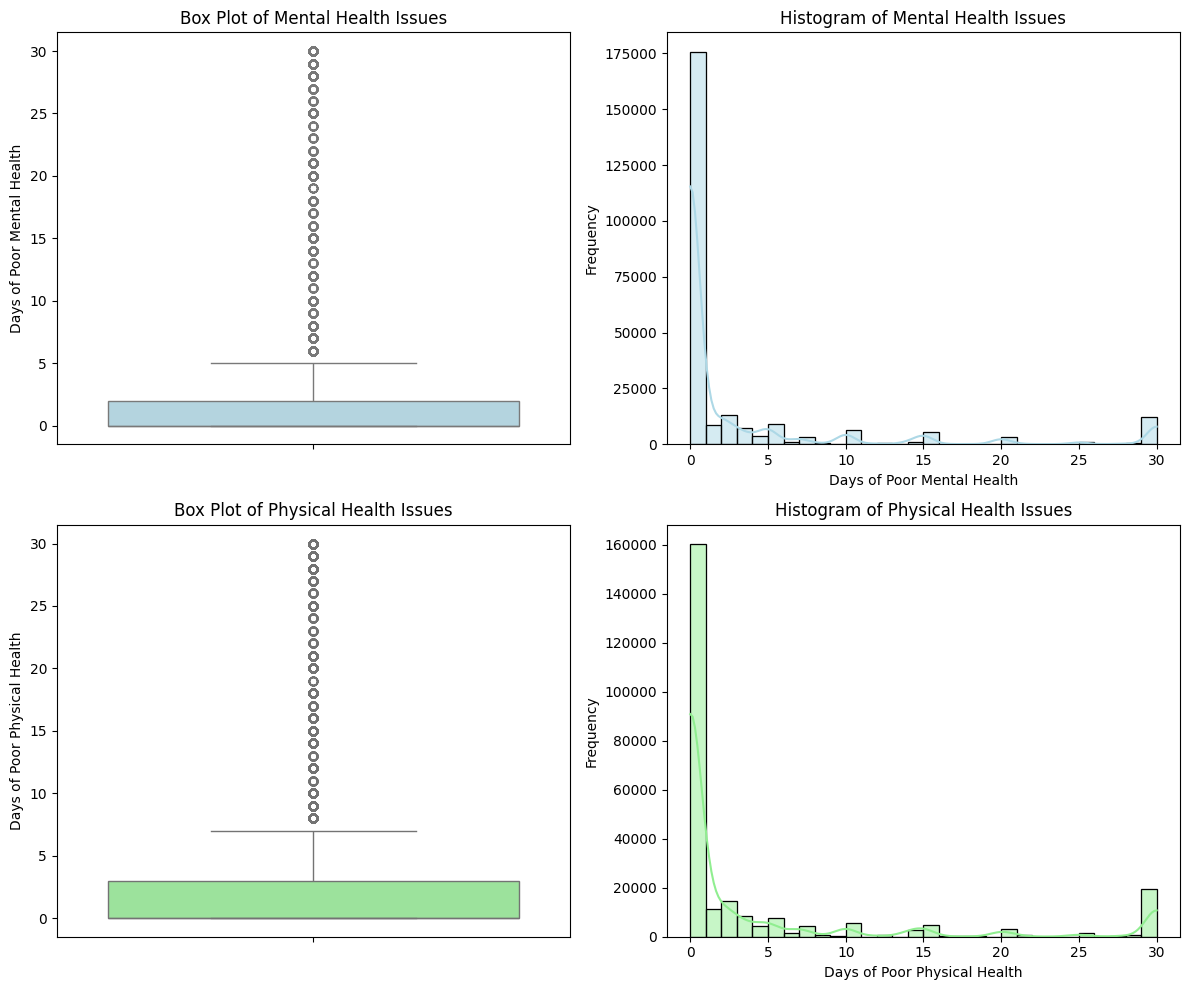

In [ ]:
# Create a figure with two rows and two columns
plt.figure(figsize=(12, 10))

# Box plot for Mental Health (MentHlth)
plt.subplot(2, 2, 1)
sns.boxplot(y=diabetes_data['MentHlth'], color='lightblue')
plt.title('Box Plot of Mental Health Issues')
plt.ylabel('Days of Poor Mental Health')

# Histogram for Mental Health (MentHlth)
plt.subplot(2, 2, 2)
sns.histplot(diabetes_data['MentHlth'], kde=True, color='lightblue', bins=30)
plt.title('Histogram of Mental Health Issues')
plt.xlabel('Days of Poor Mental Health')
plt.ylabel('Frequency')

# Box plot for Physical Health (PhysHlth)
plt.subplot(2, 2, 3)
sns.boxplot(y=diabetes_data['PhysHlth'], color='lightgreen')
plt.title('Box Plot of Physical Health Issues')
plt.ylabel('Days of Poor Physical Health')

# Histogram for Physical Health (PhysHlth)
plt.subplot(2, 2, 4)
sns.histplot(diabetes_data['PhysHlth'], kde=True, color='lightgreen', bins=30)
plt.title('Histogram of Physical Health Issues')
plt.xlabel('Days of Poor Physical Health')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<u>**Insight 10:**</u> Healthcare access is generally good (95.1%), but cost remains a barrier for some (8.4%). <br>

<ipython-input-336-d05a12962ab2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Healthcare Access', 'Cost Barrier'], y=[healthcare_access, cost_barrier], palette='Set2')


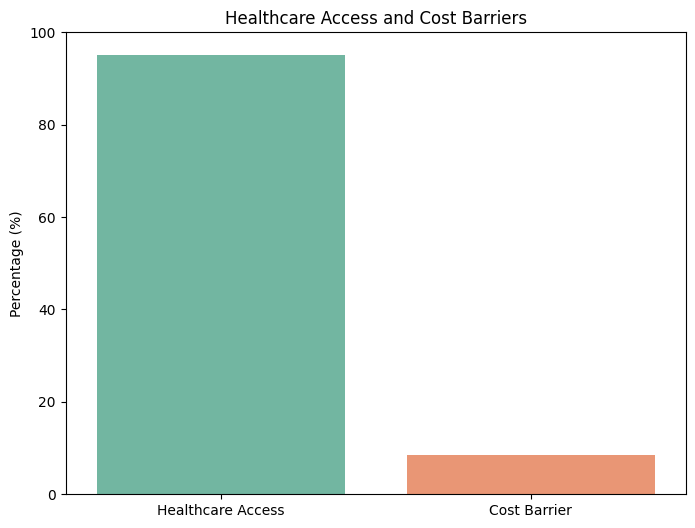

In [ ]:
# Calculate healthcare access and cost barriers
healthcare_access = diabetes_data['AnyHealthcare'].mean() * 100
cost_barrier = diabetes_data['NoDocbcCost'].mean() * 100

# Bar plot for healthcare access and cost barriers
plt.figure(figsize=(8, 6))
sns.barplot(x=['Healthcare Access', 'Cost Barrier'], y=[healthcare_access, cost_barrier], palette='Set2')
plt.title('Healthcare Access and Cost Barriers')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to show full range
plt.show()

## **5) Conclusion:**

### Conclusion

This assignment focused on **exploratory data analysis (EDA)**, where we delved into two distinct datasets to uncover patterns, trends, and relationships. Using a combination of univariate and bivariate techniques, we analyzed numerical and categorical variables, creating visualizations such as histograms, scatter plots, and box plots to support our findings. These tools allowed us to identify key insights, such as correlations between health metrics and the distribution of demographic factors like income and general health.

Through this EDA process, we gained a deeper understanding of the datasets and honed our ability to extract meaningful insights from raw data. The use of Python libraries like Pandas, Matplotlib, and Seaborn ensured our analysis was both reproducible and visually compelling. This exercise reinforced the importance of EDA as a foundational step in data science, preparing us for more advanced analyses for the next assignments of the course.

## **6) References**

- CSI4142 | Course notes (Week 1 & 2)

* https://seaborn.pydata.org/

* https://matplotlib.org/stable/tutorials/index.html

* https://www.skytowner.com/explore/reading_data_from_github_in_pandas

* https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test

- https://www.geeksforgeeks.org/data-analysis-with-python/

- https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

- https://www.omdena.com/blog/a-beginners-guide-to-exploratory-data-analysis-with-python
